In [6]:
import numpy as np
import h5py
import matplotlib.pyplot as plt


%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
def load_dataset():
    with h5py.File(r'C:\Users\User\Desktop\ms\deep learning\co-1Neural Networks and Deep Learning\data cat vs non cat\train_catvnoncat.h5', "r") as train_dataset:
        train_set_x_orig = np.array(train_dataset["train_set_x"][:])
        train_set_y_orig = np.array(train_dataset["train_set_y"][:])
    
    with h5py.File(r'C:\Users\User\Desktop\ms\deep learning\co-1Neural Networks and Deep Learning\data cat vs non cat\test_catvnoncat.h5', "r") as test_dataset:
        test_set_x_orig = np.array(test_dataset["test_set_x"][:])
        test_set_y_orig = np.array(test_dataset["test_set_y"][:])
        classes = np.array(test_dataset["list_classes"][:])

        
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [10]:
train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes=load_dataset()

In [11]:
train_set_x_orig.shape,test_set_x_orig.shape,train_set_y_orig.shape

((209, 64, 64, 3), (50, 64, 64, 3), (1, 209))

y = 0. It's a non-cat picture.


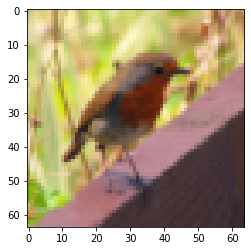

In [12]:
# Example of a picture
index =10
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y_orig[0,index]) + ". It's a " + classes[train_set_y_orig[0,index]].decode("utf-8") +  " picture.")

In [13]:
# Explore your dataset
m_train=train_set_x_orig.shape[0]
n_px=train_set_x_orig.shape[1]
m_test=test_set_x_orig.shape[0]

print('number of training example:'+ str(m_train))
print('number of testing example:'+ str(m_test))
print('pixel size of each image: ('+str(n_px)+','+str(n_px)+',3)')
print('train_set_x_orig shape:'+ str(train_set_x_orig.shape))
print('train_set_y_orig shape:'+ str(test_set_y_orig.shape))
print('test_set_x_org shape:'+ str(train_set_x_orig.shape))
print('test_set_y_org shape:'+ str(train_set_y_orig.shape))

number of training example:209
number of testing example:50
pixel size of each image: (64,64,3)
train_set_x_orig shape:(209, 64, 64, 3)
train_set_y_orig shape:(1, 50)
test_set_x_org shape:(209, 64, 64, 3)
test_set_y_org shape:(1, 209)


In [14]:
# Reshape the training and test examples 
train_x_reshape=train_set_x_orig.reshape(m_train,-1).T

test_x_reshape=test_set_x_orig.reshape(m_test,-1).T

# Standardize data to have feature values between 0 and 1
train_data=train_x_reshape/255
test_data=test_x_reshape/255

print('shape of train_data:'+str(train_data.shape))
print('shape of test_data:'+str(test_data.shape))

shape of train_data:(12288, 209)
shape of test_data:(12288, 50)


# build L-layer Neural Network

In [48]:
# forward propgation

In [50]:
# layers_dims
layers_dims = [12288,20,10,5, 1] # 5 layers_dims

In [51]:
def initialize_parameters_deep(layer_dims): 
    np.random.seed(1)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1]) #*0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters

In [52]:
parameters=initialize_parameters_deep(layers_dims)

In [54]:
def sigmoid(Z):
    
    A = 1/(1+np.exp(-Z))
    cache = Z
    
    return A, cache

def relu(Z):
    A = np.maximum(0,Z)
    
    assert(A.shape == Z.shape)
    
    cache = Z 
    return A, cache


def relu_backward(dA, cache):
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ

def sigmoid_backward(dA, cache):
    
    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ

In [55]:
# GRADED FUNCTION: linear_forward

def linear_forward(A, W, b):
    Z = np.dot(W,A)+b
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

In [56]:
# GRADED FUNCTION: linear_activation_forward

def linear_activation_forward(A_prev, W, b, activation):
    if activation ==("sigmoid"):
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        ### START CODE HERE ### (≈ 2 lines of code)
        Z, linear_cache =linear_forward(A_prev, W, b)
        A, activation_cache =sigmoid(Z)
        ### END CODE HERE ###
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        ### START CODE HERE ### (≈ 2 lines of code)
        Z, linear_cache =linear_forward(A_prev,W,b)
        A, activation_cache =relu(Z)
        ### END CODE HERE ###
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

In [57]:
# GRADED FUNCTION: L_model_forward

def L_model_forward(X, parameters):
    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        A, cache =linear_activation_forward(A_prev,parameters['W' + str(l)],parameters['b' + str(l)], activation = "relu")
        caches.append(cache)
    AL, cache =linear_activation_forward(A,parameters['W' + str(L)],parameters['b' + str(L)], activation = "sigmoid")
    caches.append(cache)
    
    assert(AL.shape == (1,X.shape[1]))      
    return AL, caches

In [58]:
AL,caches= L_model_forward(train_data,parameters)

In [59]:
# compute cost
def compute_cost(AL,Y):
    m = Y.shape[1]
    cost =-1/m*np.sum(Y*np.log(AL)+(1-Y)*(np.log(1-AL)))
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    return cost

In [60]:
compute_cost(AL,train_set_y_orig)

0.6974263436182387

In [61]:
# backward prpogation

In [62]:
# GRADED FUNCTION: linear_backward

def linear_backward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW =1/m*np.dot(dZ,A_prev.T)
    db =1/m*np.sum(dZ,axis=1,keepdims=True)
    dA_prev =np.dot(W.T,dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

In [63]:
# GRADED FUNCTION: linear_activation_backward

def linear_activation_backward(dA, cache, activation):
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ =relu_backward(dA, activation_cache)
        dA_prev, dW, db =linear_backward(dZ, linear_cache)
        
    elif activation == "sigmoid":
        dZ =sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db =linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

In [64]:
def L_model_backward(AL, Y, caches):
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] =linear_activation_backward(dAL, current_cache, activation='sigmoid')
    for l in reversed(range(L-1)):
        current_cache =caches[l]
        dA_prev_temp, dW_temp, db_temp =linear_activation_backward(grads["dA" + str(l + 1)], current_cache, activation='relu')
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

In [65]:
grads=L_model_backward(AL,train_set_y_orig,caches)

In [66]:
def update_parameters(parameters, grads, learning_rate):
    L=len(parameters)//2
    for l in range(1,L+1):
        parameters["W" + str(l)] =parameters["W" + str(l)]-learning_rate*grads["dW" + str(l)]
        parameters["b" + str(l)] =parameters["b" + str(l)]-learning_rate*grads["db" + str(l)]
    return parameters

In [67]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.005, num_iterations = 3000, print_cost=False):
    costs=[]
    np.random.seed(1)
    #initialize_parameters_deep
    parameters=initialize_parameters_deep(layers_dims)
    
    for l in range(0,num_iterations):
        #forward propogation to calculate Z,caches
        AL, caches=L_model_forward(X,parameters)
        
        cost=compute_cost(AL,Y)
        #backward propogation to calculate dW,db
        grads=L_model_backward(AL,Y,caches)
        # update parameters
        parameters=update_parameters(parameters, grads, learning_rate)
        
        # Print the cost every 100 training example
        if print_cost and l % 100 == 0:
            print ("Cost after iteration",(l, cost))
        if print_cost and l % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration (0, 0.6974263436182387)
Cost after iteration (100, 0.6406442543683772)
Cost after iteration (200, 0.5938781222960045)
Cost after iteration (300, 0.5375497986349348)
Cost after iteration (400, 0.4695149425966948)
Cost after iteration (500, 0.3952390769081236)
Cost after iteration (600, 0.3890810375990435)
Cost after iteration (700, 0.347652740659199)
Cost after iteration (800, 0.307261982127032)
Cost after iteration (900, 0.2728419143662881)
Cost after iteration (1000, 0.1613877764634844)
Cost after iteration (1100, 0.10663186616398887)
Cost after iteration (1200, 0.07645538982471728)
Cost after iteration (1300, 0.055528471098705984)
Cost after iteration (1400, 0.04171104595420929)
Cost after iteration (1500, 0.032197655847414776)
Cost after iteration (1600, 0.025556391173707664)
Cost after iteration (1700, 0.02082219800680568)
Cost after iteration (1800, 0.017316520857487472)
Cost after iteration (1900, 0.014680465714996812)


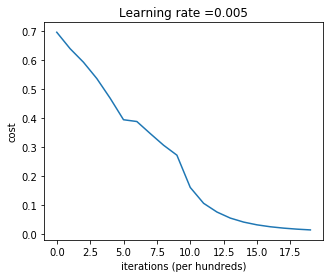

In [68]:
parameters = L_layer_model(train_data,train_set_y_orig, layers_dims, num_iterations = 2000, print_cost = True)

In [69]:
def predict(X, y, parameters):
    m = X.shape[1]
    n = len(parameters) # number of layers in the neural network
    p = np.zeros((1,m))
    # Forward propagation
    AL, caches = L_model_forward(X, parameters)
    # convert probas to 0/1 predictions
    for i in range(0,AL.shape[1]):
        if AL[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    print("Accuracy: "  + str(np.sum((p == y)/m)))
        
    return p

In [70]:
pred_train = predict(train_data,train_set_y_orig, parameters)

Accuracy: 0.9999999999999998


In [71]:
pred_train = predict(test_data,test_set_y_orig, parameters)

Accuracy: 0.76
